In [6]:
#pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install TextBlob

In [93]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [94]:
# Pandas - Data manipulation and analysis library
import pandas as pd

# Tweepy - Python library for accessing the Twitter API.
import tweepy

# Regular Expression Python module
import re

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

In [2]:
config = pd.read_csv('config.csv')

In [19]:
twitterApiKey = config.iloc[0][0]
twitterApiSecret = config.iloc[0][1]
twitterApiAccessToken = config.iloc[0][2]
twitterApiAccessTokenSecret = config.iloc[0][3]

In [24]:
auth = tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [25]:
twitterAccount = "BillGates"

In [47]:
tweets = tweepy.Cursor(twitterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(20);

In [41]:
for tweet in tweets:
    print(tweet)

In [48]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [49]:
df

,Tweet
0,Congratulations @AndrewSteerWRI on this import...
1,Thank you @SalKhanAcademy for a great conversa...
2,"For decades, Australian researcher Ruth Bishop..."
3,"RT @GlobalFund: Speaking from villages, riverb..."
4,Virologist Ruth Bishop pioneered the research ...
5,"RT @AnitaZaidi: On International Women’s Day, ..."
6,Thank you @BarackObama for the kind words. You...
7,RT @wkamaubell: Black folks have questions abo...
8,Moving to a green economy is the biggest chall...
9,We can’t avoid a climate disaster without corp...


In [67]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [70]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [71]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [76]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [79]:
df.head(20)

,Tweet,Subjectivity,Polarity
0,Congratulations on this important role. I’m e...,0.875000,0.387500
1,Thank you for a great conversation about clim...,0.475000,0.500000
2,"For decades, Australian researcher Ruth Bishop...",0.000000,0.000000
3,"Speaking from villages, riverbanks and rural c...",0.000000,0.000000
4,Virologist Ruth Bishop pioneered the research ...,0.000000,0.000000
5,"On International Women’s Day, join me in celeb...",0.666667,0.166667
6,Thank you for the kind words. Your leadership...,0.900000,0.600000
7,Black folks have questions about the COVID-19 ...,0.385185,-0.162963
8,Moving to a green economy is the biggest chall...,0.300000,-0.200000
9,We can’t avoid a climate disaster without corp...,0.000000,0.000000


In [80]:
# remove all the rows with the Tweet column equals to ""
df = df.drop(df[df['Tweet'] == ''].index)

In [81]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [82]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [83]:
df.head(20)

,Tweet,Subjectivity,Polarity,Score
0,Congratulations on this important role. I’m e...,0.875000,0.387500,Positive
1,Thank you for a great conversation about clim...,0.475000,0.500000,Positive
2,"For decades, Australian researcher Ruth Bishop...",0.000000,0.000000,Neutral
3,"Speaking from villages, riverbanks and rural c...",0.000000,0.000000,Neutral
4,Virologist Ruth Bishop pioneered the research ...,0.000000,0.000000,Neutral
5,"On International Women’s Day, join me in celeb...",0.666667,0.166667,Positive
6,Thank you for the kind words. Your leadership...,0.900000,0.600000,Positive
7,Black folks have questions about the COVID-19 ...,0.385185,-0.162963,Negative
8,Moving to a green economy is the biggest chall...,0.300000,-0.200000,Negative
9,We can’t avoid a climate disaster without corp...,0.000000,0.000000,Neutral


In [85]:
df.iloc[7][0]

'Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…'

In [86]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

50.0 % of positive tweets


<BarContainer object of 3 artists>

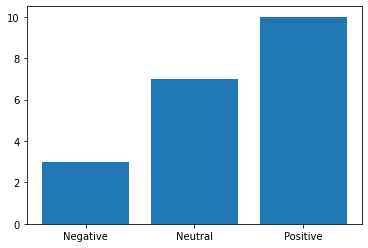

In [90]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

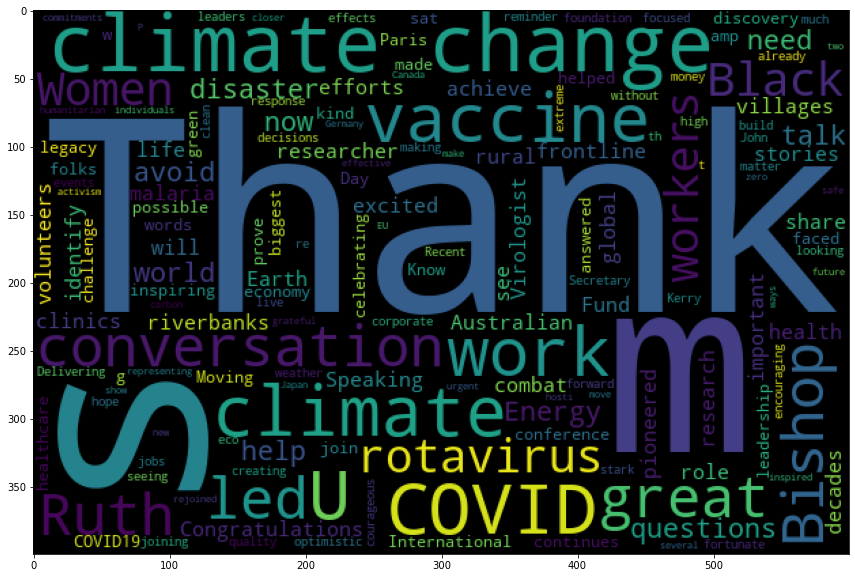

In [98]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.show()

In [ ]:
import 